In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
import sascorer
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/lpc_0066/Desktop/Dataset/その他/Volume of Distribution/VDss_dataset_uen.csv", index_col=0)

In [3]:
df

,SMILES,MW,logP,VDss(L/kg),logVDss
0,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,341.495,4.52530,2.410000,0.382017
1,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,484.663,4.66680,4.300000,0.633468
2,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,326.440,1.55450,4.000000,0.602060
3,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,666.910,5.47560,0.320000,-0.494850
4,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,352.500,2.16868,1.800000,0.255273
...,...,...,...,...,...
2435,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,420.513,-1.60310,0.229087,-0.640000
2436,CCCCC[C@H](O)CC[C@@H]1[C@H]2Cc3cccc(OCC(=O)O)c...,390.520,3.58320,0.229087,-0.640000
2437,Cn1c(N)c(NC(=O)NCCN)c[n+]1CC1=C(C(=O)O)N2C(=O)...,667.711,-2.56860,0.169824,-0.770000
2438,CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(F)c(F)c2)c2nnn([...,522.578,2.01370,1.258925,0.100000


,SMILES,MW,logP,VDss(L/kg),logVDss,ROMol
0,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,341.495,4.52530,2.410000,0.382017,
1,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,484.663,4.66680,4.300000,0.633468,
2,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,326.440,1.55450,4.000000,0.602060,
3,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,666.910,5.47560,0.320000,-0.494850,
4,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,352.500,2.16868,1.800000,0.255273,
...,...,...,...,...,...,...
2435,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,420.513,-1.60310,0.229087,-0.640000,
2436,CCCCC[C@H](O)CC[C@@H]1[C@H]2Cc3cccc(OCC(=O)O)c...,390.520,3.58320,0.229087,-0.640000,
2437,Cn1c(N)c(NC(=O)NCCN)c[n+]1CC1=C(C(=O)O)N2C(=O)...,667.711,-2.56860,0.169824,-0.770000,
2438,CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(F)c(F)c2)c2nnn([...,522.578,2.01370,1.258925,0.100000,

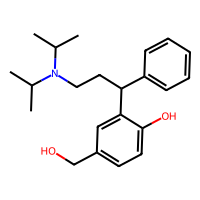
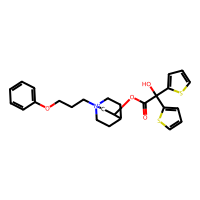
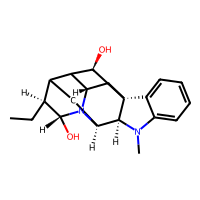
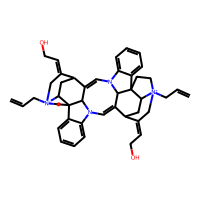
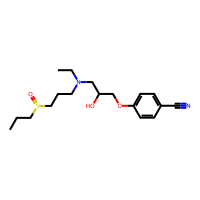
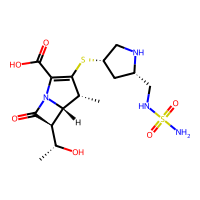
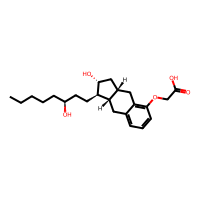
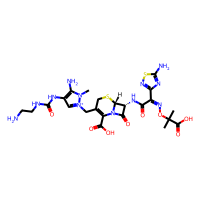
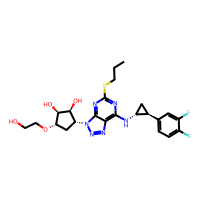
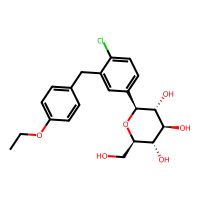

In [4]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='SMILES')
df

In [5]:
df["SA_score"] = [sascorer.calculateScore(mol) for mol in df["ROMol"]]

In [6]:
df["SA_score"].argmax()

3

In [7]:
df_arrange = df.sort_values(by=["SA_score"])
df_arrange[:5].SMILES

766            CC(=O)Nc1ccccc1
920            O=C(O)Cc1ccccc1
845          O=C(O)CCCc1ccccc1
1508      CCOc1ccc(NC(C)=O)cc1
1096    O=C(O)CCNC(=O)c1ccccc1
Name: SMILES, dtype: object

In [8]:
top5 = list(df_arrange[:5].SMILES)
top5

['CC(=O)Nc1ccccc1',
 'O=C(O)Cc1ccccc1',
 'O=C(O)CCCc1ccccc1',
 'CCOc1ccc(NC(C)=O)cc1',
 'O=C(O)CCNC(=O)c1ccccc1']

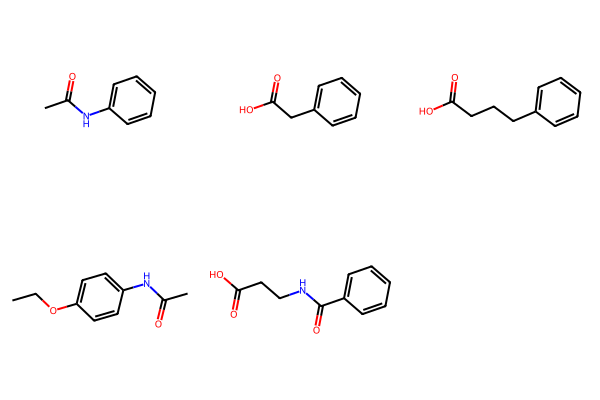

In [9]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in top5])

In [10]:
tm = Chem.MolFromSmiles("[d]c2cc1cc(C[g])c(C[t])cc1cc2[e]")

[17:14:48] SMILES Parse Error: syntax error while parsing: [d]c2cc1cc(C[g])c(C[t])cc1cc2[e]
[17:14:48] SMILES Parse Error: Failed parsing SMILES '[d]c2cc1cc(C[g])c(C[t])cc1cc2[e]' for input: '[d]c2cc1cc(C[g])c(C[t])cc1cc2[e]'
